<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/02_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron, MNIST
---
This notebook is adapted from an [introductory course of Udacity](https://github.com/udacity/deep-learning-v2-pytorch).

In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [1]:
# import libraries
import torch
import numpy as np


---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

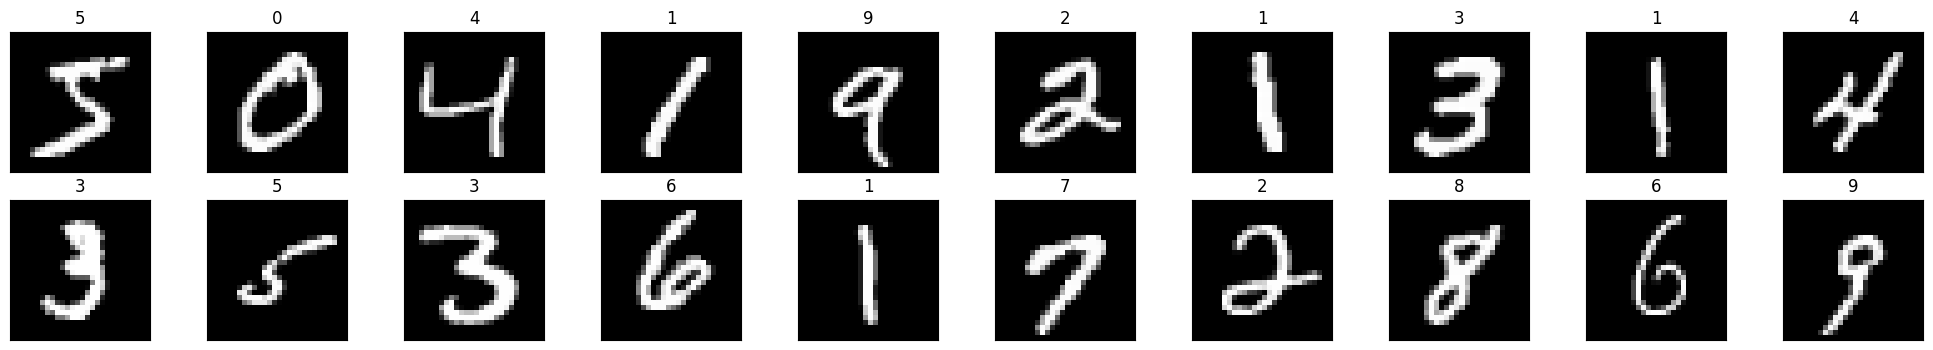

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 // 2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an Image in More Detail

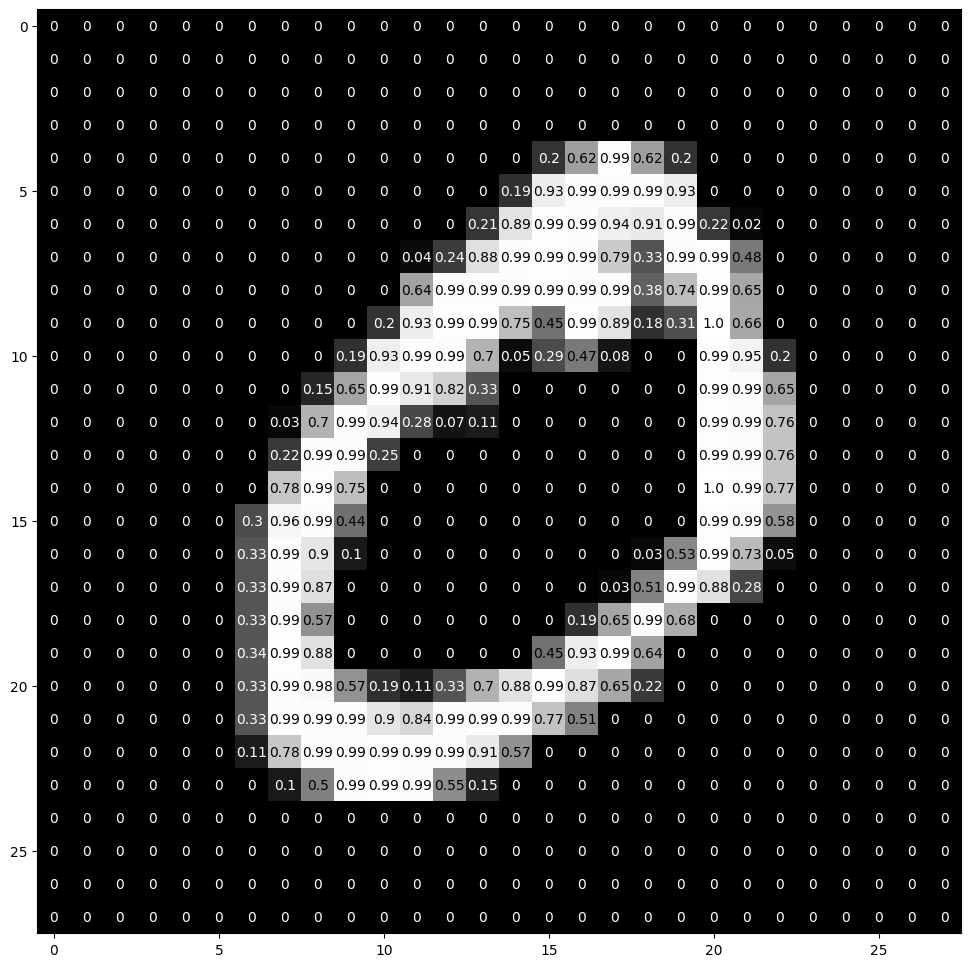

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# Aufgabe 1

### Excercises

#### Excercise 2.1
Fill in all the blank spots to train a basic MLP on handwritten digit recognition. What result can you achieve?

In [1]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [2]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

NameError: name 'torch' is not defined

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [ ]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.381786
Epoch: 2 	Training Loss: 0.298712
Epoch: 3 	Training Loss: 0.283638
Epoch: 4 	Training Loss: 0.274944
Epoch: 5 	Training Loss: 0.268775
Epoch: 6 	Training Loss: 0.264148
Epoch: 7 	Training Loss: 0.260453
Epoch: 8 	Training Loss: 0.257431
Epoch: 9 	Training Loss: 0.254871
Epoch: 10 	Training Loss: 0.252685
Epoch: 11 	Training Loss: 0.250748
Epoch: 12 	Training Loss: 0.249042
Epoch: 13 	Training Loss: 0.247520
Epoch: 14 	Training Loss: 0.246133
Epoch: 15 	Training Loss: 0.244826
Epoch: 16 	Training Loss: 0.243582
Epoch: 17 	Training Loss: 0.242410
Epoch: 18 	Training Loss: 0.241347
Epoch: 19 	Training Loss: 0.240368
Epoch: 20 	Training Loss: 0.239435
Epoch: 21 	Training Loss: 0.238546
Epoch: 22 	Training Loss: 0.237723
Epoch: 23 	Training Loss: 0.236932
Epoch: 24 	Training Loss: 0.236196
Epoch: 25 	Training Loss: 0.235500
Epoch: 26 	Training Loss: 0.234847
Epoch: 27 	Training Loss: 0.234203
Epoch: 28 	Training Loss: 0.233613
Epoch: 29 	Training Loss: 0.2

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.267691

Test Accuracy of     0: 97% (960/980)
Test Accuracy of     1: 97% (1112/1135)
Test Accuracy of     2: 86% (891/1032)
Test Accuracy of     3: 91% (925/1010)
Test Accuracy of     4: 91% (900/982)
Test Accuracy of     5: 89% (802/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 90% (928/1028)
Test Accuracy of     8: 87% (856/974)
Test Accuracy of     9: 93% (943/1009)

Test Accuracy (Overall): 92% (9226/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

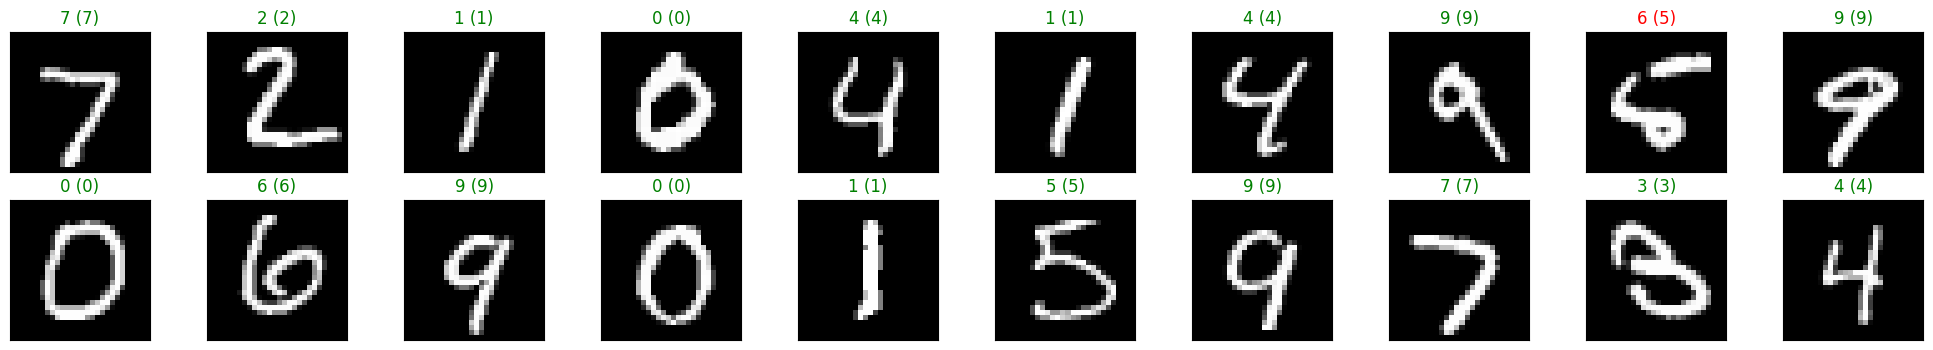

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

Ergebnis:

Mithilfe des Optimierers SGD und mit der learning rate 0.1 wurde ein Training Loss von 0.232450 erzielt. Die Test Accuracy liegt bei 92%.

# Aufgabe 2



#### Excercise 2.2
Adapt the network architecture, batch size and optimiser to increase accuracy. What is the best result you can achieve? Why do you think your changes improved the performance? What did you try what didnt work?

In [5]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer 
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 10)
        self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [ ]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 2e-1)

: 

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [ ]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    if epoch == 15:
        optimizer = torch.optim.SGD(model.parameters(), lr = 5e-2)
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.392814
Epoch: 2 	Training Loss: 0.143627
Epoch: 3 	Training Loss: 0.111141
Epoch: 4 	Training Loss: 0.092930
Epoch: 5 	Training Loss: 0.081191
Epoch: 6 	Training Loss: 0.072241
Epoch: 7 	Training Loss: 0.065224
Epoch: 8 	Training Loss: 0.059644
Epoch: 9 	Training Loss: 0.053566


---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.164909

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 98% (1123/1135)
Test Accuracy of     2: 97% (1002/1032)
Test Accuracy of     3: 97% (983/1010)
Test Accuracy of     4: 97% (957/982)
Test Accuracy of     5: 96% (865/892)
Test Accuracy of     6: 96% (929/958)
Test Accuracy of     7: 97% (1002/1028)
Test Accuracy of     8: 96% (941/974)
Test Accuracy of     9: 95% (962/1009)

Test Accuracy (Overall): 97% (9734/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

IndexError: index 10 is out of bounds for axis 0 with size 10

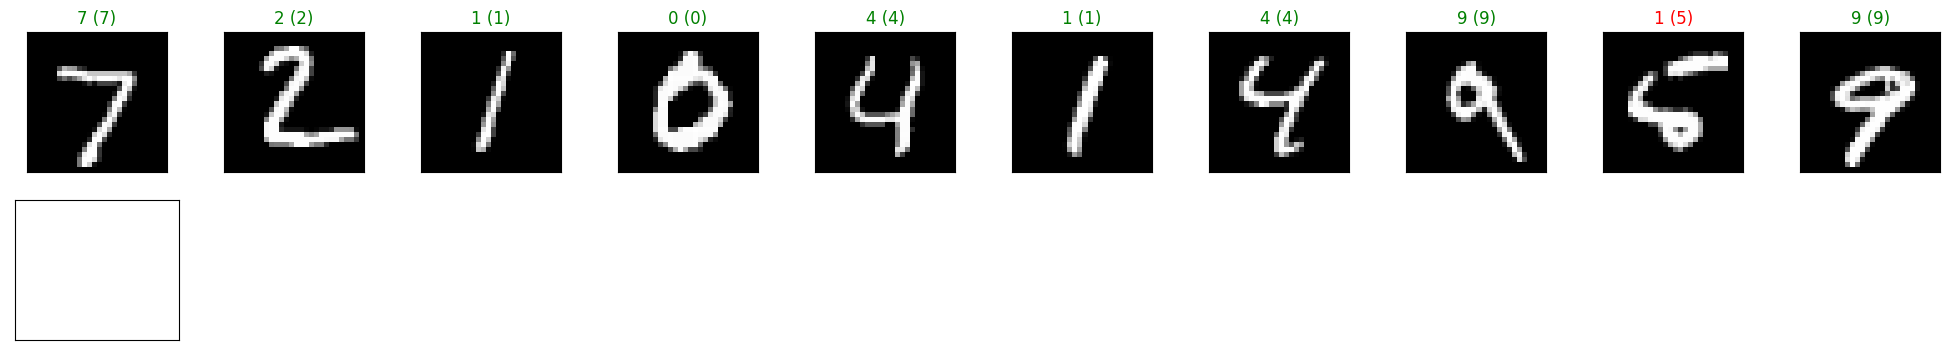

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

Mit einem zusätzlichen Layer, das 10 auf 10 nodes abbildet, erreicht man eine Test Accuracy von 92% und einen Training Loss von 0.176989.

Mit drei Layers (28*28 -> 64 -> 10 nodes) erreicht man den Training Loss 0.067215 und eine Accuracy von 96% (bei learning rate 0.5).

Durch Setzen der Batch Size auf 10 und Verändern der Learning Rate ab Epoche 15 (0.2 -> 0.05) erreicht man einen Training-Loss von 0.019377 und eine Accuracy von 97%.


# Aufgabe 3



#### Excercise 2.3
Replace the fully connected layer with convolutional layers. How does the number of parameters change? Why do convolutional layers make sense for image data? Can you further increase model performance on handwritten digit recognition? Discuss again what you tried, what worked and what didn't work.



---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [6]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [7]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs
model.train() # prep model for training
model = model.cuda()
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # if epoch == 6:
    #     optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
    
    for data, target in train_loader:
        data = data.cuda()
        target = target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.179062
Epoch: 2 	Training Loss: 0.049342
Epoch: 3 	Training Loss: 0.032158
Epoch: 4 	Training Loss: 0.022901
Epoch: 5 	Training Loss: 0.016121
Epoch: 6 	Training Loss: 0.012147
Epoch: 7 	Training Loss: 0.009610
Epoch: 8 	Training Loss: 0.007843
Epoch: 9 	Training Loss: 0.008100
Epoch: 10 	Training Loss: 0.006429
Epoch: 11 	Training Loss: 0.003958
Epoch: 12 	Training Loss: 0.005554
Epoch: 13 	Training Loss: 0.003667
Epoch: 14 	Training Loss: 0.003671
Epoch: 15 	Training Loss: 0.002909
Epoch: 16 	Training Loss: 0.001660
Epoch: 17 	Training Loss: 0.001527
Epoch: 18 	Training Loss: 0.003046
Epoch: 19 	Training Loss: 0.002317
Epoch: 20 	Training Loss: 0.000720
Epoch: 21 	Training Loss: 0.000385
Epoch: 22 	Training Loss: 0.000096
Epoch: 23 	Training Loss: 0.000050
Epoch: 24 	Training Loss: 0.000035
Epoch: 25 	Training Loss: 0.000029
Epoch: 26 	Training Loss: 0.000025
Epoch: 27 	Training Loss: 0.000022
Epoch: 28 	Training Loss: 0.000020
Epoch: 29 	Training Loss: 0.0

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [8]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    data = data.cuda()
    target = target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.039626

Test Accuracy of     0: 99% (979/980)
Test Accuracy of     1: 99% (1132/1135)
Test Accuracy of     2: 99% (1023/1032)
Test Accuracy of     3: 99% (1006/1010)
Test Accuracy of     4: 99% (975/982)
Test Accuracy of     5: 98% (883/892)
Test Accuracy of     6: 98% (948/958)
Test Accuracy of     7: 99% (1024/1028)
Test Accuracy of     8: 99% (967/974)
Test Accuracy of     9: 98% (995/1009)

Test Accuracy (Overall): 99% (9932/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

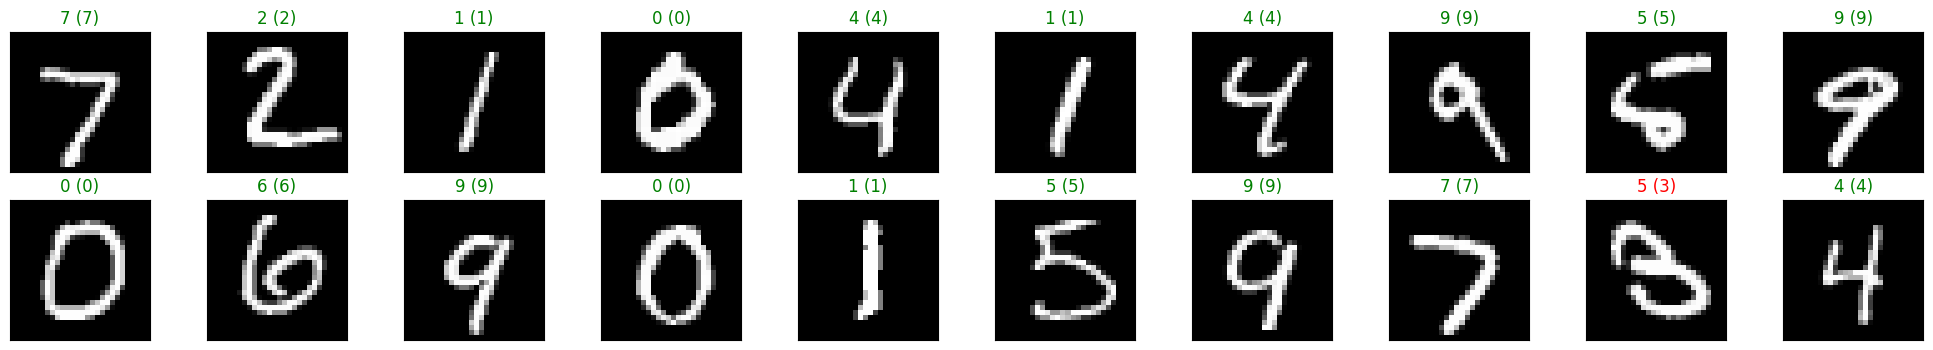

In [9]:
model = model.cpu()
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

#### Was wurde getan?
Es wurden mehrere Durchläufe versucht.

Im ersten Durchlauf wurden zwei Convolutional Layer (1 -> 16 -> 32) verwendet. Hiermit wurde lediglich erreicht:  
Training Loss: 0.722355  
Test Accuracy (Overall): 67% (6744/10000)

Dann wurden die Convolutional layer komplexer gemacht (1 -> 32 -> 64), was bedeutend bessere Ergebnisse brachte. Es wurde erreicht:  
Training Loss: 0.229137  
Test Accuracy (Overall): 98% (9896/10000)

Ein Umstellen auf learning rate=0.01 und momentum=0.9 erreicht:  
Training Loss: 0.000565  
Test Accuracy (Overall): 99% (9916/10000)

Ein Versuch mit dem Optimizer "Adam" wurde abgebrochen, da dieser bedeutend langsamer arbeitete und langsamer konvergierte.

#### Wie ändert sich die Anzahl der Parameter?
Wir betrachten das zweite Convolutional-Modell.  
Der erste Layer hat (1 (Input) \* 3\*3 (Kernel)) * 32 (Anzahl outputs) + 32 (1 Bias-Parameter pro output) = 320 Parameter.  
Der zweite Layer hat (32 \* 3\*3) * 64 + 64 = 18496 Parameter.  
Der fully-connected layer hat 64\*7\*7 Inputs (die 7 kommt von 28 /(2\*2), dies kommt daher, dass der MaxPool die Bildgröße zweimal halbiert) mal 10 Outputs plus 10 Output-Biases = (64\*7\*7)\*10+10 = 31370 Parameter.
In Summe sind das 50186 Parameter.

#### Wieso machen convolutional layers für Bilddaten Sinn?
Bei Bilddaten liegen die zusammengehörenden Daten lokal beieinander (um bspw. ein Auto zu erkennen, reicht es, einen kleinen Bildausschnitt zu betrachten. Das Auto füllt im Allgemeinen nicht das gesamte Bild aus). Diese Eigenschaft verträgt sich gut damit, dass die bei convolutional layers verwendeten Kernel ebenfalls nur lokal beieinander liegende Pixel verarbeiten. Somit lassen sich lokale Muster gut erkennen.

#### Kann man die Model-Performance für handgeschriebene Ziffernerkennung weiter verbessern?
Indem ein zusätzliches fully-connected layer eingefügt wird, also statt 64\*7\*7 -> 10 mit 64\*7\*7 -> 64 -> 10, erreicht man:  
Training Loss: 0.000017  
Test Accuracy (Overall): 99% (9932/10000).

# Using GPUs

if you have a GPU available, you can move your model to the cpu with `model = model.cuda()`. You'll also have to move data to the GPU before processing it, e.g. by running

```
data = data.cuda()
target = target.cuda()
```

for getting data back to the CPU (which you have to do before you can convert it to numpy), use `.cpu()`. In practive this offen looks like
```
loss = loss.detach().cpu().numpy()
```